In [3]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from keras.regularizers import l2

In [40]:
df = pd.read_csv('Data.csv')

In [41]:
replace_dict = {
    "ham": 0,
    "spam": 1
}

In [42]:
df["Category"] = df["Category"].replace(replace_dict) 
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [44]:
df.to_csv('NewData.csv')

In [45]:
df = pd.read_csv('NewData.csv')

In [20]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Иван\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [22]:
df['Message'] = df['Message'].apply(preprocess_text)

category = df['Category'].values
message = df['Message'].values

In [23]:
tokenizer = Tokenizer(num_words=None, char_level=True, lower=False)
tokenizer.fit_on_texts(message)
sequences = tokenizer.texts_to_sequences(message)

In [24]:
data = pad_sequences(sequences, maxlen=600)

In [36]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 10, input_length=600))
model.add(LSTM(20, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(data, category, validation_split=0.2, epochs=20, verbose=1)

Epoch 1/20
140/140 [==============================] - 56s 378ms/step - loss: 0.3854 - accuracy: 0.8748 - val_loss: 0.2268 - val_accuracy: 0.9247
Epoch 2/20
140/140 [==============================] - 54s 387ms/step - loss: 0.1423 - accuracy: 0.9632 - val_loss: 0.1299 - val_accuracy: 0.9659
Epoch 3/20
140/140 [==============================] - 53s 377ms/step - loss: 0.1096 - accuracy: 0.9733 - val_loss: 0.1058 - val_accuracy: 0.9713
Epoch 4/20
140/140 [==============================] - 54s 386ms/step - loss: 0.1030 - accuracy: 0.9758 - val_loss: 0.0990 - val_accuracy: 0.9767
Epoch 5/20
140/140 [==============================] - 53s 378ms/step - loss: 0.0953 - accuracy: 0.9769 - val_loss: 0.1031 - val_accuracy: 0.9749
Epoch 6/20
140/140 [==============================] - 53s 378ms/step - loss: 0.0896 - accuracy: 0.9773 - val_loss: 0.1145 - val_accuracy: 0.9731
Epoch 7/20
140/140 [==============================] - 53s 381ms/step - loss: 0.0880 - accuracy: 0.9780 - val_loss: 0.1041 - val_ac

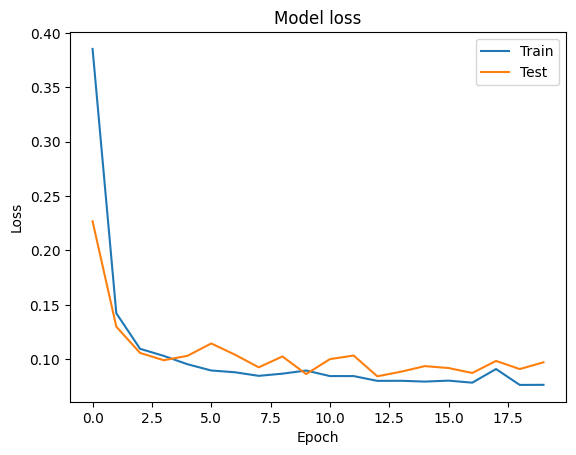

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()